In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

survey_df = pd.read_csv('survey_results_public.csv')

In [62]:
major_df  = survey_df[['UndergradMajor', 'NEWEdImpt', 'EdLevel', 'Employment']].copy()
cs_df     = major_df[major_df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'].copy()
non_cs_df = major_df[major_df['UndergradMajor'] != 'Computer science, computer engineering, or software engineering'].copy()

cs_df = cs_df.dropna(subset = ['UndergradMajor'])
non_cs_df = non_cs_df.dropna(subset = ['UndergradMajor'])

#Creates two dataframes, one group who formally studied Computer Science and One that didn't drops non answers

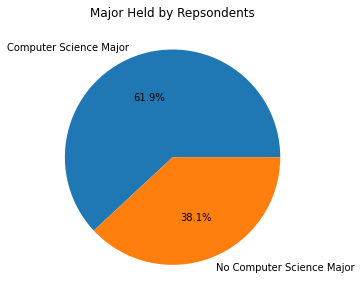

In [49]:
pie_list = []
pie_list.append(len(cs_df))
pie_list.append(len(non_cs_df))
pie_labels = ['Computer Science Major', 'No Computer Science Major']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(pie_list, labels = pie_labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title('Major Held by Repsondents')
plt.savefig('MajorPieChart.jpg')
#General comparison of respondent proportions

In [38]:
def get_percent(pd_series):
    pd_series = pd_series.astype('float64')
    total = pd_series.sum()
    for x in range(len(pd_series)):
        pd_series[x] = (pd_series[x]/total)*100
    return pd_series
#function to convert a pandas series into percentages

In [51]:
cs = cs_df['NEWEdImpt'].value_counts()
non_cs = non_cs_df['NEWEdImpt'].value_counts()
#Gets value counts
cs = get_percent(cs)
non_cs = get_percent(non_cs)
#converts to percentages 
frame = { 'Computer Science Major': cs, 'No Computer Science Major': non_cs } 
cs_result = pd.DataFrame(frame) 
cs_result = cs_result.reindex(['Critically important','Very important','Fairly important','Somewhat important','Not at all important/not necessary'])
#creates dataframe then orders index in desired order

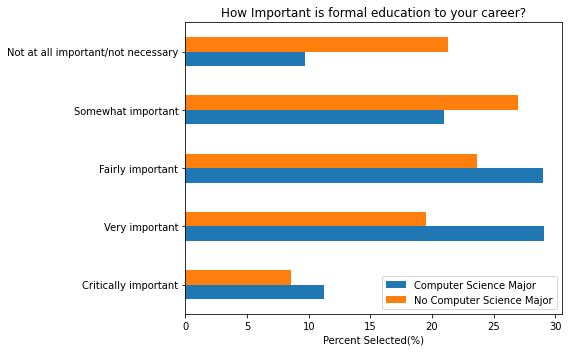

In [52]:
ax = cs_result.plot(kind = 'barh', figsize = (8,5),title = 'How Important is formal education to your career?')
ax.set(xlabel="Percent Selected(%)")
plt.tight_layout()
plt.savefig('ImpEduRslt.jpg')
#Plots horizontal bar graph to compare CS Major vs no CS Major

In [59]:
cs_employ = cs_df['Employment'].value_counts()
cs_employ = get_percent(cs_employ)
#gets value counts for employment and converts to percentage
non_cs_employ = non_cs_df['Employment'].value_counts()
non_cs_employ = get_percent(non_cs_employ)
#gets value counts for employment and converts to percentage
frame_e = { 'Computer Science Major': cs_employ, 'No Computer Science Major': non_cs_employ } 
em_result = pd.DataFrame(frame_e) 
em_result = em_result.reindex(['Employed full-time', 'Employed part-time', 'Not employed, but looking for work', 'Not employed, and not looking for work', 'Student', 'Retired'])
#creates dataframe then orders index in desired order

<Figure size 432x288 with 0 Axes>

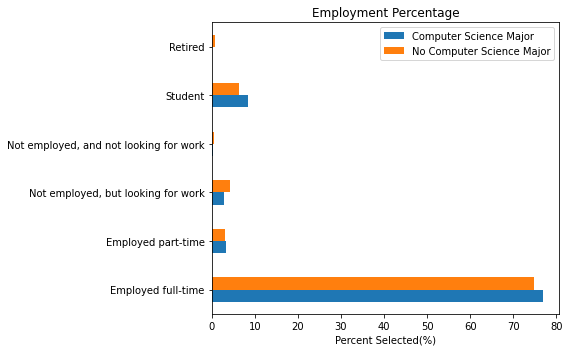

In [60]:
plt.figure()
ax1 = em_result.plot(kind = 'barh', figsize = (8,5),title = 'Employment Percentage')
ax1.set(xlabel="Percent Selected(%)")
plt.tight_layout()
plt.savefig('EmployRslt.jpg')
#Plots horizontal bargraph to compare results